In [4]:
import torch
import matplotlib.pyplot as plt
A=8
W=1
widths = [0.25,0.5,1,2]
baseline_acc = [[] for i in range(len(widths))]
VA_acc = [[] for i in range(len(widths))]

noise_list = (0.1,0.2,0.3,0.4,0.5)

for i in range(len(widths)):
    width = widths[i]
    print("VGG %sx"%width)
    root_dir = '../Exprm_VGG%sx/'%(width)
    if width == 1:
        root_dir = ''
    for noise in noise_list:
        basemodel = root_dir+'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        VAmodel = root_dir+'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)

        basemodel_res = torch.load(basemodel)
        VAmodel_res = torch.load(VAmodel)

        print("noise %s"%noise)
        print("QAT %.4f"%(basemodel_res['mean_acc']))
        print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
        print("")
        baseline_acc[i].append(basemodel_res['mean_acc'])
        VA_acc[i].append(VAmodel_res['mean_acc'])

VGG 0.25x
noise 0.1
QAT 0.7891
QAT+VAT 0.7984

noise 0.2
QAT 0.7544
QAT+VAT 0.7594

noise 0.3
QAT 0.6868
QAT+VAT 0.7329

noise 0.4
QAT 0.5923
QAT+VAT 0.6882

noise 0.5
QAT 0.4705
QAT+VAT 0.6293

VGG 0.5x
noise 0.1
QAT 0.8479
QAT+VAT 0.8481

noise 0.2
QAT 0.8294
QAT+VAT 0.8339

noise 0.3
QAT 0.7924
QAT+VAT 0.8079

noise 0.4
QAT 0.7321
QAT+VAT 0.7838

noise 0.5
QAT 0.6407
QAT+VAT 0.7565

VGG 1x
noise 0.1
QAT 0.8803
QAT+VAT 0.8796

noise 0.2
QAT 0.8709
QAT+VAT 0.8704

noise 0.3
QAT 0.8522
QAT+VAT 0.8569

noise 0.4
QAT 0.8217
QAT+VAT 0.8371

noise 0.5
QAT 0.7729
QAT+VAT 0.8184

VGG 2x
noise 0.1
QAT 0.8990
QAT+VAT 0.8977

noise 0.2
QAT 0.8932
QAT+VAT 0.8913

noise 0.3
QAT 0.8811
QAT+VAT 0.8822

noise 0.4
QAT 0.8598
QAT+VAT 0.8727

noise 0.5
QAT 0.8267
QAT+VAT 0.8591



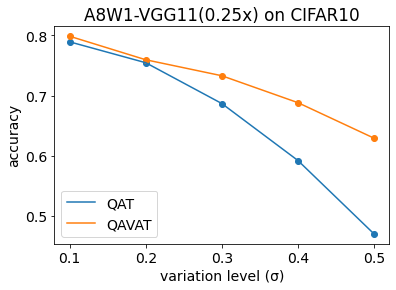

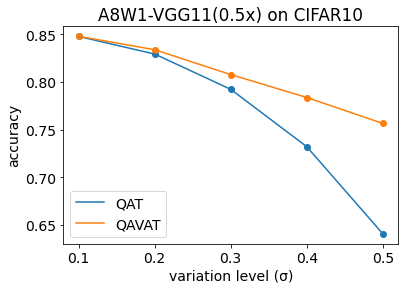

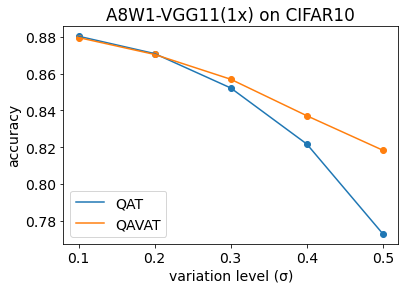

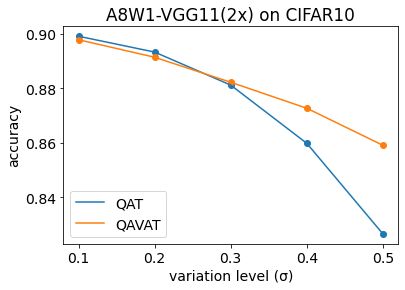

In [5]:
for i in range(len(widths)):
    plt.rcParams.update({'font.size': 14})
    plt.plot(noise_list,baseline_acc[i],label='QAT')
    plt.scatter(noise_list,baseline_acc[i])
    plt.plot(noise_list,VA_acc[i],label='QAVAT')
    plt.scatter(noise_list,VA_acc[i])
    plt.title('A%sW%s-VGG11(%sx) on CIFAR10'%(A,W,widths[i]))
    plt.xlabel('variation level (\u03C3)')
    plt.ylabel('accuracy')
    plt.legend(loc='lower left')
    plt.savefig('A%sW%s-VGG%s.pdf'%(A,W,widths[i]))
    plt.show()

VA improvement:
 [[ 0.0092957  0.0049231  0.0461108  0.0959462  0.1587875]
 [ 0.0001774  0.0045168  0.0154657  0.051653   0.1158619]
 [-0.0007196 -0.0004558  0.0047369  0.0153876  0.0454687]
 [-0.001278  -0.0018908  0.0010378  0.012839   0.0324422]]
mean improvement:
 [0.06301266 0.03753496 0.01288356 0.00863004]
max improvement:
 [0.1587875 0.1158619 0.0454687 0.0324422]


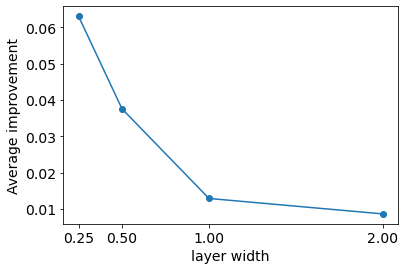

In [6]:
import numpy as np
VA_acc = np.array(VA_acc)
baseline_acc = np.array(baseline_acc)
VA_improvement = VA_acc - baseline_acc
print('VA improvement:\n',VA_improvement)
print('mean improvement:\n',VA_improvement.mean(axis=1))
print('max improvement:\n',VA_improvement.max(axis=1))
plt.plot(widths,VA_improvement.mean(axis=1))
plt.scatter(widths,VA_improvement.mean(axis=1))
plt.xlabel('layer width')
plt.ylabel('Average improvement')
plt.xticks(widths)
plt.title('')
plt.savefig('VGGA%sW%s_width_improvement.pdf'%(A,W))
    